# Assignment 2: Spam Classification with SVM
Name: Rakshith Raghu(rr5de)

### CS 4501 Machine Learning - Department of Computer Science - University of Virginia

![Spam email](https://www.saleshandy.com/blog/wp-content/uploads/2017/01/wsi-imageoptim-11-Reasons-Why-Your-Email-Ends-Up-In-Spam.png)

*Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the assignment, you will use SVMs to build your own spam filter. For references, you may refer to my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


---
## 1. PRE-PROCESSING THE DATA (20 pts)

**Data Acquiring:** Download the spam dataset from UC Irvine. You can find the dataset attached with the assignment in Collab. Note that the data is in raw file, so you have to convert them into a readable format (ie. CSV). Please be sure to read its documentation to learn more about the dataset. 

**Data Splitting:** Put data into the format needed for classification task, then split it into 80% training, 20% testing (each should have approximately the same proportion between positive and negative examples).

**Data Discovery:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your SVM model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. 

**Feature Scaling** You can use the standard library StandardScaler to normalize the value of each features.

In [1]:
#This cell will compile the data into a dataframe
import pandas as pd
import numpy as np

#getting columns
text_file = open("spambase/spambase.columns", "r")
names = text_file.read().split(',')
names.append("IsSpam")

text_file.close()

spam = pd.read_csv(filepath_or_buffer = "spambase/spambase.data", names = names)
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,IsSpam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [2]:
#checking for null data points
sample_incomplete_rows = spam[spam.isnull().any(axis=1)].head()
sample_incomplete_rows


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,IsSpam


No null data points, so nothing new has to be inserted all data is continous, so no dummy variables have to be added

In [3]:
#checking correlations with IsSpam
correlation_matrix = spam.corr()
correlation_matrix["IsSpam"].sort_values(ascending = False)

IsSpam                          1.000000
\nword_freq_your                0.383234
\nword_freq_000                 0.334787
\nword_freq_remove              0.332117
\nchar_freq_$                   0.323629
\nword_freq_you                 0.273651
\nword_freq_free                0.263215
\nword_freq_business            0.263204
\ncapital_run_length_total\n    0.249164
\nword_freq_our                 0.241920
\nchar_freq_!                   0.241888
\nword_freq_receive             0.234529
\nword_freq_over                0.232604
\nword_freq_order               0.231551
\nword_freq_money               0.216111
\ncapital_run_length_longest    0.216097
\nword_freq_internet            0.206808
\nword_freq_email               0.204208
\nword_freq_all                 0.196988
\nword_freq_addresses           0.195902
\nword_freq_credit              0.189761
\nword_freq_mail                0.138962
\nword_freq_people              0.132927
word_freq_make                  0.126208
\ncapital_run_le

features nword_freq_your, nword_freq_000, nword_freq_remove, nchar_freq_$ appear highest correlated with IsSpam with the absolute value of their correlations being above .3

In [4]:
# You might want to use the following packages
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

total_train, total_test = train_test_split(spam, test_size = 0.2, random_state = 40)



# Your code goes here for this section.
X_train = total_train.drop("IsSpam", axis=1);
y_train = pd.DataFrame(total_train["IsSpam"].copy());
X_test = total_test.drop("IsSpam", axis=1);
y_test = pd.DataFrame(total_test["IsSpam"].copy());

In [9]:
#using standardscalar to normalize the features
scaler = StandardScaler()

train_names = names[:-1]

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= train_names)
X_test = pd.DataFrame(scaler.transform(X_test), columns = train_names)
#warning will occur saying the data is being transformed into floats. This is fine
X_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.341621,-0.167265,-0.562336,-0.049319,-0.461045,-0.346217,-0.292291,-0.251117,-0.327786,-0.362981,...,-0.117702,-0.157987,-0.492035,-0.170734,-0.316622,-0.299829,-0.100029,-0.128729,-0.247909,-0.485738
1,-0.341621,-0.167265,-0.562336,-0.049319,0.467115,1.849003,-0.292291,-0.251117,-0.327786,-0.362981,...,-0.117702,0.746469,0.300194,-0.170734,-0.316622,-0.299829,-0.100029,-0.100070,-0.228916,-0.395553
2,-0.341621,-0.167265,-0.562336,-0.049319,-0.461045,-0.346217,-0.292291,-0.251117,-0.327786,-0.362981,...,-0.117702,-0.157987,-0.492035,2.189761,0.205392,-0.299829,-0.100029,-0.115804,-0.195679,-0.411162
3,-0.341621,-0.167265,0.739773,-0.049319,-0.461045,1.919817,-0.292291,-0.251117,-0.327786,-0.362981,...,-0.117702,-0.157987,0.303731,-0.170734,-0.054450,-0.299829,-0.100029,-0.102879,-0.195679,-0.353929
4,-0.341621,-0.167265,-0.562336,-0.049319,-0.461045,-0.346217,-0.292291,-0.251117,-0.327786,-0.362981,...,-0.117702,-0.157987,-0.492035,-0.170734,-0.316622,-0.299829,-0.100029,-0.128729,-0.247909,-0.482269


In [6]:
print(np.ravel(y_train))

[0 0 0 ... 0 0 0]


- - -
## 2. TRAINING LINEAR SVM FOR SPAM CLASSIFICATION (15 pts)

Train your linear SVM classifier on the training data, and then test the classifier on the test data. You may use the default **loss function** (="hinge") and **default** value of the C hyperparameter (=1.0):

* Report (1) accuracy, (2) precision, (3) recall, and (4) F-score on the test data
* Create an ROC curve, using 100 evenly spaced thresholds, for this SVM. You may use library function calls to create the ROC curve.

**Implementation Notes:** For SVM, you do NOT need to add a column of 1's to the $\mathbf{x}$ matrix to have an intercept term


Precision score =  0.9069767441860465
Recall score =  0.8914285714285715
F_1 score =  0.899135446685879
Accuracy =  0.9239956568946797


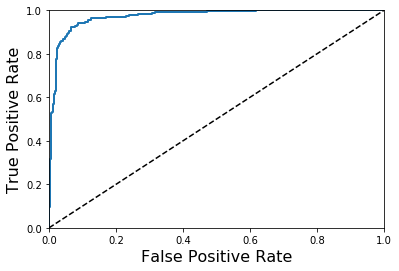

In [81]:
from sklearn.svm import LinearSVC

# Training your svm here
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42,max_iter=5000)
svm_clf.fit(X_train, np.ravel(y_train))
#I was given a warning here that the "Liblinear failed to converge". It recommended increasing the number of iterations

y_pred = svm_clf.predict(X_test)

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
accuracy = accuracy_score(y_test,y_pred)

print("Precision score = ", precision)
print("Recall score = ", recall)
print("F_1 score = ", F)
print("Accuracy = ", accuracy)



from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

#helper function to do plotting of roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

y_pred = svm_clf.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr,tpr)
plt.show()



- - -
## 3. TUNING REGULARIZATION HYPER-PARAMETER C (15 pts)
Next, you will study the SVM tradeoff between margin and data violation by using different values of the C hyper-parameter. Your task is to run an experiment with different values of C on the spam dataset and report the performance measures similar to section 2. After running the experiment, you must provide some justifications on the reason you select a certain value of C. 

Hint: you can use cross validation for each value of C and then pick the value which yields the best performance.

In [28]:
import warnings
warnings.filterwarnings("ignore")

svm_clf = LinearSVC(C=.1, loss="hinge", random_state=42,max_iter=5000)
#svm_clf.fit(X_test, np.ravel(y_test))
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = [{'C': [.001,.01, .1, 1, 10, 100]}]

clf = GridSearchCV(LinearSVC(), param_grid, cv=5)
clf.fit(X_train, np.ravel(y_train))

print('Best score: ', clf.best_score_)
best = clf.best_estimator_
print(best)

Best score:  0.9274456521739131
LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [29]:
#with the best mean cross validation score (with 5 folds) at 10, I then run between 5 to 90 to refine C

param_grid = [{'C': [5,10, 20, 30, 40, 50, 60, 70, 80, 90]}]
clf = GridSearchCV(LinearSVC(), param_grid, cv=5)
clf.fit(X_train, np.ravel(y_train))

print('Best score: ', clf.best_score_)
best = clf.best_estimator_
print(best)

Best score:  0.9293478260869565
LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [30]:
#With the best C still at 10, I refine the space to be between 5 to 15
param_grid = [{'C': [5,6, 7, 8, 9, 10, 11, 12, 13, 14,15]}]
clf = GridSearchCV(LinearSVC(), param_grid, cv=5)
clf.fit(X_train, np.ravel(y_train))

print('Best score: ', clf.best_score_)
best = clf.best_estimator_
print(best)

Best score:  0.928804347826087
LinearSVC(C=6, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [31]:
#With the best C at 6, I refine the space to be between 5 to 7
param_grid = [{'C': [5.2, 5.4, 5.6, 5.8, 6, 6.2, 6.4, 6.6, 6.8]}]
clf = GridSearchCV(LinearSVC(), param_grid, cv=5)
clf.fit(X_train, np.ravel(y_train))

print('Best score: ', clf.best_score_)
best = clf.best_estimator_
print(best)

Best score:  0.9296195652173913
LinearSVC(C=5.8, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


I chose the optimal parameter C=5.8, as it has the highest mean cross validation score refined from range .01 to 100

- - -
## 4. SELECTING THE FEATURES WITH LINEAR SVM (20 pts)

Once your learned a best linear SVM in previous sections, your next task is to find which are best features to classify spam. First, you must obtain the weight vector $\mathbf{w}$ using the attribute $coef_$ of your SVM classifier. Then, for the number of features $n = 2$ to $57$, you will run the following in a loop:

* Select a set of top $n$ features that have the highest weights
* Train a classifier $\text{SVM}_n$ on all training data, only using these $n$ features with the same hyperparameter C learn from section 3.
* Test $\text{SVM}_n$ on the test set (using the same $n$ features) to obtain accuracy.
* Plot accuracy on test data vs. $n$ number of features

Identify the top 5 features. Using the plot, discuss the effects of feature selection on the performance in a short paragraph (ie. How much better the performance becomes everytime one of top 5 features is added? Were the top spam features surprising to you?)  



In [65]:
#Finding the set of top n features
accuracy_list = []

svm_clf = LinearSVC(C=5.8, loss="hinge", random_state=42,max_iter=5000)
svm_clf.fit(X_train, np.ravel(y_train))
svm_clf.coef_

weights = abs(np.ravel(svm_clf.coef_))


index = 0
highest = 0

for x in range(57):
    highest = 0
    for i in range(57):
        if abs(weights[i]) > highest:
            highest = weights[i]
            index = i
    accuracy_list.append(names[index])
    weights[index] = 0
#This gives a list with the names of the highest weights
accuracy_list

['\nword_freq_george',
 '\nword_freq_cs',
 '\nword_freq_hp',
 '\ncapital_run_length_longest',
 '\nword_freq_3d',
 '\nword_freq_edu',
 '\nchar_freq_$',
 '\nword_freq_meeting',
 '\nword_freq_remove',
 '\nword_freq_85',
 '\nword_freq_hpl',
 '\nword_freq_project',
 '\nchar_freq_#',
 '\nword_freq_lab',
 '\nword_freq_free',
 '\nword_freq_000',
 '\nword_freq_re',
 '\ncapital_run_length_average',
 '\nword_freq_857',
 '\nchar_freq_!',
 '\nword_freq_conference',
 '\nword_freq_our',
 '\nword_freq_credit',
 '\nword_freq_technology',
 '\ncapital_run_length_total\n',
 '\nword_freq_pm',
 '\nword_freq_your',
 '\nword_freq_data',
 '\nword_freq_business',
 '\nword_freq_money',
 '\nword_freq_internet',
 '\nword_freq_415',
 '\nchar_freq_;',
 '\nword_freq_order',
 '\nword_freq_650',
 '\nword_freq_over',
 '\nword_freq_font',
 '\nword_freq_email',
 'word_freq_make',
 '\nword_freq_labs',
 '\nword_freq_receive',
 '\nword_freq_parts',
 '\nword_freq_direct',
 '\nword_freq_will',
 '\nchar_freq_[',
 '\nword_freq_o

In [ ]:
#The list above, is sorted with highest absolute value weights at the top. 
#The top 5 features are:
#George, cs, hp, capital_run_length_longest, and 3d
#It is likely these features (with the majority being negative weights) have to do with the 
#person's job. George probably being the person's name.

In [75]:
# Your feature selection code goes here
num_features = []
acc_data = []
svm_feature = LinearSVC(C=5.8, loss="hinge", random_state=42,max_iter=5000)

for i in range(1,57):
    svm_feature.fit(X_train[accuracy_list[:i]], np.ravel(y_train))
    y_pred = svm_feature.predict(X_test[accuracy_list[:i]])
    num_features.append(i+1)
    acc_data.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Accuracy Score')

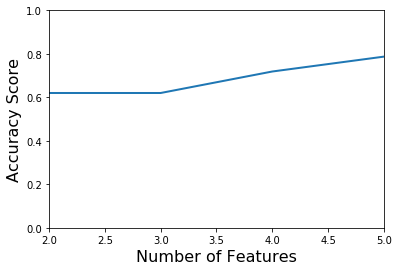

In [117]:
#plotting accuracy against number of features for first 10 features
plt.plot(num_features, acc_data, linewidth=2, label=None)
plt.axis([2, 5, 0, 1])
plt.xlabel('Number of Features', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=16)

Text(0, 0.5, 'Accuracy Score')

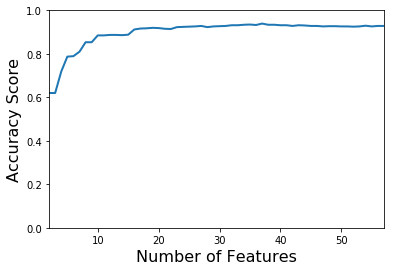

In [116]:
#plotting accuracy against number of features for all 57 features
plt.plot(num_features, acc_data, linewidth=2, label=None)
plt.axis([2, 57, 0, 1])
plt.xlabel('Number of Features', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=16)

# Your paragraph goes here for this section
So from the first 2 features to the total 5, accuracy increased from around .6 to .8 which is an increase of .2. What
was interesting to note was that the introduction of the 3rd feature did not seriously increase the accuracy of the
model. Maybe the the third feature correlates well with the other 2? After the first spike to .8 from the first 5
features, increasing the number of features has a increasing effect on the capability of the model up to around 20
features. Afterwards, there appears to be little change with even a minimal decrease in capability at around 35
features. In terms of any of the top 5 being suprising, none of the 5 mentioned features were at .3 or above correlation with the prediction when just looking at correlation. Since the model is using SVM to separate the groups, 
that is acceptable.

- - -
## 5. KERNELIZING SVM WITH THE GAUSSIAN RBF (30 pts)

In this part of the asisgnment, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on this dataset which is not linearly separable. 

$
    \mathbf{K}_{RBF}(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = \exp(-\gamma ||\mathbf{x}^{(i)} -\mathbf{x}^{(j)}||^2).
$

First, your task is to determine the best regularization $C$ and the spread of the Gaussian kernel $\gamma$ hyperparameters to use. You can train the SVM on the training set and report the performance in metrics from section 2. By using different values of $C$ and $\gamma$, you will be able to learn a good non-linear decision boundary that can perform reasonably well for this dataset. 

Next, you will compare the performance of this kernelized version of SVM and the of linear SVM in Section 3. You will need to plot out the performance in terms of accuracy, precision, and recall, and the ROC curve) for both. How much better does your non-linear SVM classifier perform comparing to a linear SVM? 

**Implementation Note:** When implementing cross validation to select the best C and $\gamma$ parameter to use, you need to evaluate the error using cross validation.

Finally, write a paragraph reporting on the final performance of your RBF kerneled SVM. Do you think the performance is adequate to be deployed in practice? Justify your reasons.




In [91]:
from sklearn.svm import SVC
# hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2), ...
# for gamma, C in hyperparams:
#rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=gamma, C=C))
#rbf_kernel_svm_clf.fit(X_train, y_train)

#    # Your code to train and find the best value of C and gamma here
#Going to test for F-1 score
#starting from optimal C from linear SVM

#gamma 0.01, C= 5.8
rbf_1 = SVC(kernel="rbf", gamma=.01, C=5.8)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 5.8 and gamma = 0.01, F_1 = ", F)

#gamma 0.1, C = 5.8
rbf_1 = SVC(kernel="rbf", gamma=.1, C=5.8)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 5.8 and gamma = 0.1, F_1 = ", F)


#gamma 0.001, C = 5.8
rbf_1 = SVC(kernel="rbf", gamma=.001, C=5.8)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 5.8 and gamma = 0.001, F_1 = ", F)

#gamma 1, C = 5.8
rbf_1 = SVC(kernel="rbf", gamma=1, C=5.8)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 5.8 and gamma = 1, F_1 = ", F)


#gamma .4, C = 5.8
rbf_1 = SVC(kernel="rbf", gamma=.4, C=5.8)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 5.8 and gamma = .4, F_1 = ", F)
print("Optimal gamma is likely between 0.001 to .1")



for C = 5.8 and gamma = 0.01, F_1 =  0.9175108538350216
for C = 5.8 and gamma = 0.1, F_1 =  0.9061102831594636
for C = 5.8 and gamma = 0.001, F_1 =  0.8963503649635035
for C = 5.8 and gamma = 1, F_1 =  0.6962962962962963
for C = 5.8 and gamma = .4, F_1 =  0.776831345826235
Optimal gamma is likely between 0.001 to .1


In [90]:
#Optimal gamma is likely between 0.001 to .1, Testing other values of C here
#Given C was optimal earlier at 5.8, will test in range 1-10 for C (using .01 for gamma)

#gamma .01, C = 1
rbf_1 = SVC(kernel="rbf", gamma=.01, C=1)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 1 and gamma = .01, F_1 = ", F)

#gamma .01, C = 3
rbf_1 = SVC(kernel="rbf", gamma=.01, C=3)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 3 and gamma = .01, F_1 = ", F)


#gamma .01, C = 5
rbf_1 = SVC(kernel="rbf", gamma=.01, C=5)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 5 and gamma = .01, F_1 = ", F)


#gamma .01, C = 7
rbf_1 = SVC(kernel="rbf", gamma=.01, C=7)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 7 and gamma = .01, F_1 = ", F)

#gamma .01, C = 9
rbf_1 = SVC(kernel="rbf", gamma=.01, C=9)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 9 and gamma = .01, F_1 = ", F)

print("Higher C is leading to better score. Will test with higher range")

for C = 1 and gamma = .01, F_1 =  0.9101449275362319
for C = 3 and gamma = .01, F_1 =  0.9117221418234442
for C = 5 and gamma = .01, F_1 =  0.9130434782608695
for C = 7 and gamma = .01, F_1 =  0.9190751445086706
for C = 9 and gamma = .01, F_1 =  0.9206349206349207
Higher C is leading to better score. Will test with higher range


In [95]:
#Higher C is leading to better scores. Will test from range 10-100

#gamma .01, C = 10
rbf_1 = SVC(kernel="rbf", gamma=.01, C=10)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 10 and gamma = .01, F_1 = ", F)

#gamma .01, C = 30
rbf_1 = SVC(kernel="rbf", gamma=.01, C=30)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 30 and gamma = .01, F_1 = ", F)

#gamma .01, C = 50
rbf_1 = SVC(kernel="rbf", gamma=.01, C=50)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 50 and gamma = .01, F_1 = ", F)

#gamma .01, C = 80
rbf_1 = SVC(kernel="rbf", gamma=.01, C=80)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 80 and gamma = .01, F_1 = ", F)
print("C above 10 had a lower score than C = 9. C = 9 will be assumed to be reasonably optimal")

for C = 10 and gamma = .01, F_1 =  0.9193083573487031
for C = 30 and gamma = .01, F_1 =  0.9175108538350216
for C = 50 and gamma = .01, F_1 =  0.9193083573487031
for C = 80 and gamma = .01, F_1 =  0.9195402298850575
C above 10 had a lower score than C = 9. C = 9 will be assumed to be reasonably optimal


In [108]:
#Now focusing on refining gamma
#gamma .005, C = 9
rbf_1 = SVC(kernel="rbf", gamma=.005, C=9)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 9 and gamma = .005, F_1 = ", F)

#gamma .008, C = 9
rbf_1 = SVC(kernel="rbf", gamma=.008, C=9)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 9 and gamma = .008, F_1 = ", F)

#gamma .01, C = 9
rbf_1 = SVC(kernel="rbf", gamma=.01, C=9)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 9 and gamma = .01, F_1 = ", F)

#gamma .013, C = 9
rbf_1 = SVC(kernel="rbf", gamma=.013, C=9)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 9 and gamma = .013, F_1 = ", F)

#gamma .015, C = 9
rbf_1 = SVC(kernel="rbf", gamma=.015, C=9)
rbf_1.fit(X_train,y_train)
y_pred = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
F = 2*((precision*recall)/(precision+recall))
print("for C = 9 and gamma = .015, F_1 = ", F)
print("F-1 reaches it's max at gamma 0.01, so that gamma will be chosen")

for C = 9 and gamma = .005, F_1 =  0.9135446685878962
for C = 9 and gamma = .008, F_1 =  0.9190751445086706
for C = 9 and gamma = .01, F_1 =  0.9206349206349207
for C = 9 and gamma = .013, F_1 =  0.9190751445086706
for C = 9 and gamma = .015, F_1 =  0.918840579710145
F-1 reaches it's max at gamma 0.01, so that gamma will be chosen


Using the F-1 score and guess and check, the boundary for a reasonable C and gamma was restricted to C = 9, gamma = .01. Below I will show the results of the various metrics on the two models created.

In [109]:
svm_clf = LinearSVC(C=5.8, loss="hinge", random_state=42,max_iter=5000)
rbf_1 = SVC(kernel="rbf", gamma=.015, C=9)

svm_clf.fit(X_train,y_train)
rbf_1.fit(X_train,y_train)

y_predl = svm_clf.predict(X_test)
y_prednl = rbf_1.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print("precision score for linear model = ", precision_score(y_test,y_predl))
print("precision score for nonlinear model = ", precision_score(y_test,y_prednl))
print("recall score for linear model = ", recall_score(y_test,y_predl))
print("recall score for nonlinear model = ", recall_score(y_test,y_prednl))
print("accuracy score for linear model = ", accuracy_score(y_test,y_predl))
print("accuracy score for nonlinear model = ", accuracy_score(y_test,y_prednl))




precision score for linear model =  0.9125364431486881
precision score for nonlinear model =  0.9323529411764706
recall score for linear model =  0.8942857142857142
recall score for nonlinear model =  0.9057142857142857
accuracy score for linear model =  0.9272529858849077
accuracy score for nonlinear model =  0.9391965255157437


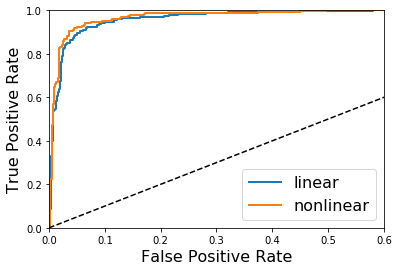

In [115]:
#Plotting the 2 roc curves
def plot_roc_curve(fpr, tpr, fp, tp, label=None):
    plt.plot(fpr, tpr, linewidth=2, label="linear")
    plt.plot(fp, tp, linewidth=2, label="nonlinear")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, .6, 0, 1])
    plt.legend(loc="lower right", fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

y_predl = svm_clf.decision_function(X_test)
y_prednl = rbf_1.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_predl)
fp, tp, threshold = roc_curve(y_test, y_prednl)
plot_roc_curve(fpr,tpr, fp, tp)
plt.show()

I did not push the axis of the false positive rate all the way to 1 as both models "lines" reached 1 TPR around or before 0.6.The resultant ROC curves shows a superior nonlinear plot as it is above or equivalent to the linear curve at all points. In precision, the nonlinear model was .02 higher than the linear model. In Recall, the nonlinear model is around .006 greater than the linear model. In Accuracy, the nonlinear model is around .01 superior to the linear model.

I am unsure whether it would be appropriate to deploy the model for the individual. For the general public I would be against it since specific terms possibly relating to identity or job are used highly in weighting whether it is spam or not (for the specific person in this case). The model is precise at .9, but that .1 is still significant. Model accuracy being at around .94 is good, but that .06 of emails that may be misclassified is an issue. It would thus depend on how secure the email must be. If it must be highly secure, I would err on the side of misclassification against an email, and thus this model would be fine. If the individual did not want to miss any relevant emails, this model would not be good enough. 

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4501 Assignment 2:...".

Best of luck and have fun!